<br>
<p style="font-size:35px;" >Loan Investment Risk Evaluation using Keras - ANN</p>
<br>
<br>

### by <a href="https://www.linkedin.com/in/kartikey-tyagi-58892b1a4/">Kartikey Tyagi</a>

----
---
## Table of Contents:

### 1. [Introduction](#intro)
### 2. [Exploratory Data Analysis](#eda)
### 3. [Data PreProcessing](#preprocess)
### 4. [Dealing with categorical variables and strings](#dummy)
### 5. [Train Test Split](#tts)
### 6. [Creating a Model](#model)
   - [Using Ensembling technique to deal with imbalancing](#ensemble)
   - [Using SMOTE to deal with imbalancing](#smote)
   
### 7. [Final Evaluation](#evaluation)        
### 8. [Testing our model for a new person seeking loan](#testing)


----
----
<a id='intro'></a>
# Introduction

LendingClub is a fintech that provides range of financial products and services through a technology-driven platform in the United States. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission, and to offer loan trading on a secondary market.

### The Dataset

We will be using a subset of the LendingClub Dataset from Kaggle.
Our dataset has approximately 4 lakh entries and a total of 27 features to analyse.
However, there are some missing values and some features that we cannot use directly as an input to our ANN model, so we will clean and feature engineer our data to get the most out of the information that we have.

### Our goal

- <b>Primary Goal</b>: 
   - To determine whether we will offer a loan to a person given their financial history
- <b>Secondary Goals</b> : 
  - To explore the data and find out which features affect our results the most and the least.
  - To extract information out of some features that have string value.
  - Clean our data to remove null values

The objective of this notebook will be to analyse a subset of the lending club dataset and correctly predict whether or not a person will pay back the loan given the historical data.
First we will explore the data using <b>matplotlib</b> and <b>seaborn</b>. Our next task will to preprocess the data and feature engineer some new features and build a model to make predictions.

We will use <b>Keras</b> which is a Python interface for <b>Artificial Neural Networks</b>(ANN).

----
---

### Loading the data and other imports

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [176]:
df = pd.read_csv('lending_club_loan_two.csv')

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [178]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

### Importing Lending Club Information Data

In [179]:
data_info = pd.read_csv('lending_club_info.csv',index_col = 'LoanStatNew')

In [180]:
data_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, loan_amnt to pub_rec_bankruptcies
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  28 non-null     object
dtypes: object(1)
memory usage: 448.0+ bytes


In [181]:
def feat_info(col):
    print(data_info.loc[col]['Description'])

In [182]:
features = data_info.index
for col_name in features:
    print(col_name+ ":")
    feat_info(col_name)
    print('\n')

loan_amnt:
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


term:
The number of payments on the loan. Values are in months and can be either 36 or 60.


int_rate:
Interest Rate on the loan


installment:
The monthly payment owed by the borrower if the loan originates.


grade:
LC assigned loan grade


sub_grade:
LC assigned loan subgrade


emp_title:
The job title supplied by the Borrower when applying for the loan.*


emp_length:
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


home_ownership:
The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER


annual_inc:
The self-reported annual income provided by the borrower during registration.


verification_status:
Indicates if income was v

----
---
<a id='eda'></a>
# Exploratory Data Analysis

<AxesSubplot:xlabel='loan_status', ylabel='count'>

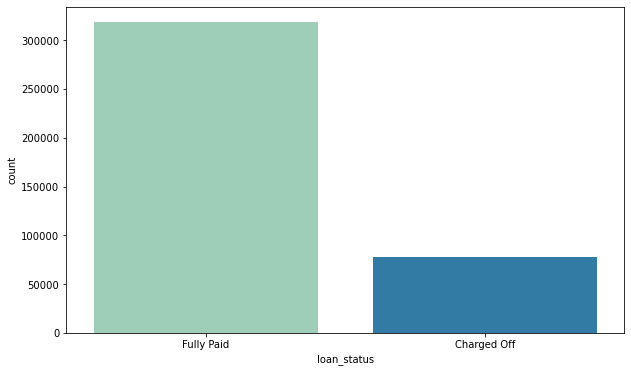

In [198]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'loan_status', data = df, palette= 'YlGnBu')

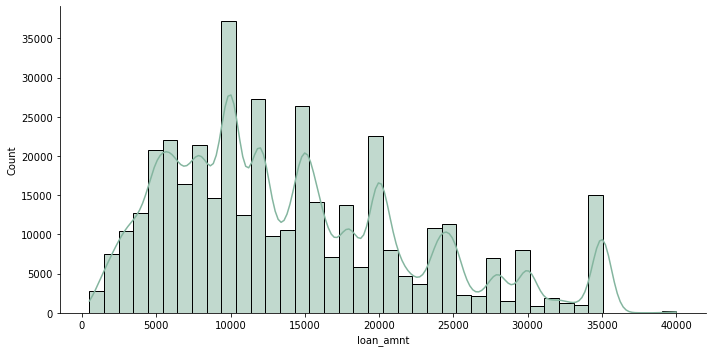

In [203]:
sns.displot(df['loan_amnt'],kde = True,bins = 40,aspect = 2, color='#84b59f')

In [11]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

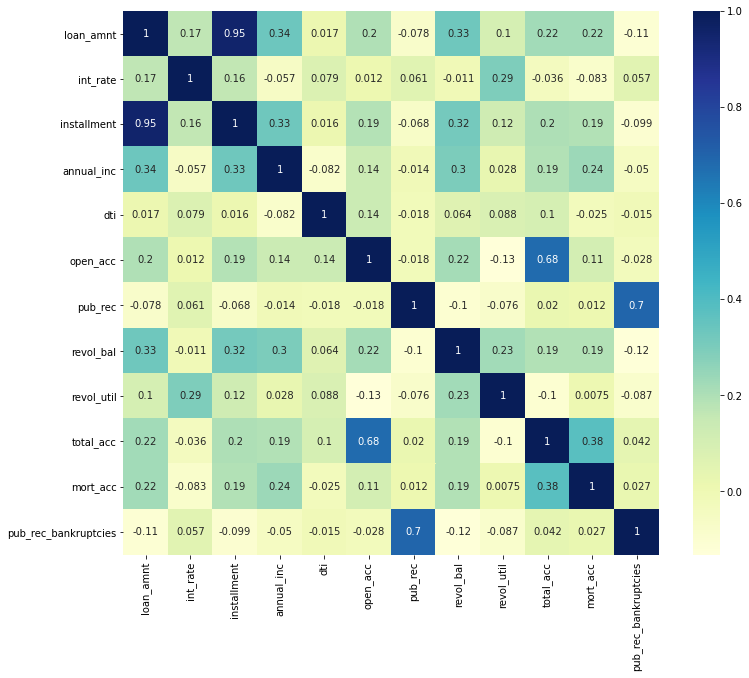

In [201]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),annot = True, cmap = 'YlGnBu')

In [13]:
#installment feature has strong relationship, we'll explore that.

In [216]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [217]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

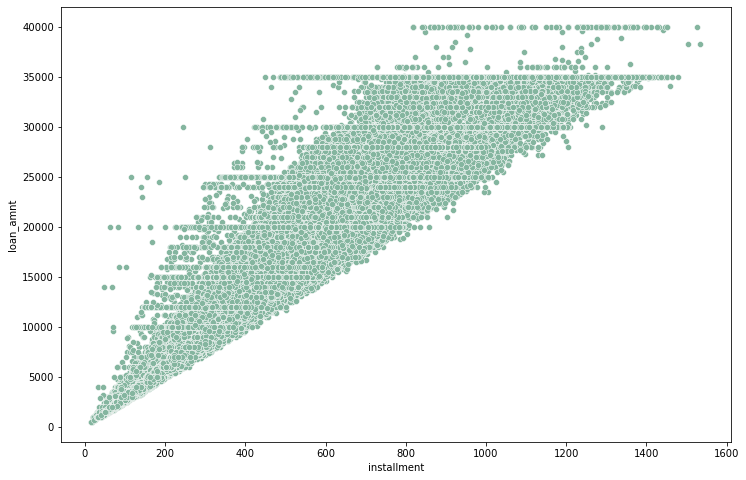

In [218]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'installment', y = 'loan_amnt', data = df, c = ['#84b59f'])

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

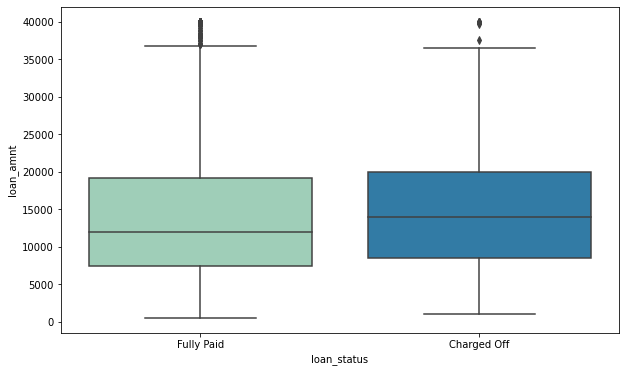

In [219]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df, palette = 'YlGnBu')

Greater mean loan amount implies slightly greater probability of it being charged off.

Checking summary statistics for loan amount, grouped by loan status

In [220]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


### Exploring grade and sub_grade columns

In [221]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [222]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

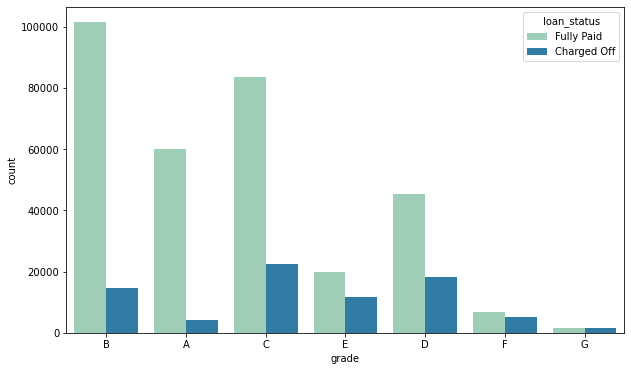

In [223]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'grade', data = df, hue = 'loan_status',palette='YlGnBu')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

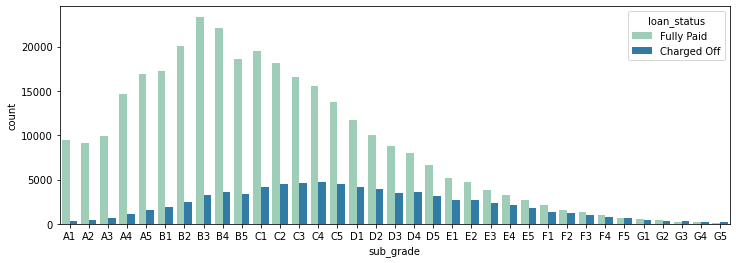

In [224]:
plt.figure(figsize = (12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data = df,order = subgrade_order,palette='YlGnBu', hue = 'loan_status')

Now focusing on F and G graded borrowers

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

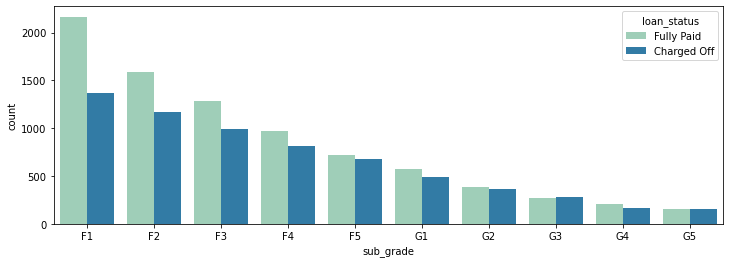

In [225]:
f_and_g = df[(df['grade'] == 'F') | (df['grade'] == 'G')]

plt.figure(figsize = (12,4))
fg_list = 'F1 F2 F3 F4 F5 G1 G2 G3 G4 G5'.split()
sns.countplot(x = 'sub_grade', data = f_and_g,order = fg_list,palette='YlGnBu', hue = 'loan_status')

Creating another column that will have numerical values (0 or 1) for fully paid and charged off loans

In [226]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [227]:
df['loan_repaid'] = df['loan_status'].apply(lambda status: 1 if status == 'Fully Paid' else 0)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [228]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539,-0.059836
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450,-0.247758
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628,-0.041082
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162,0.053432
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558,-0.062413
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732,-0.028012
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408,-0.019933
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532,0.010892
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751,-0.082373
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035,0.017893


<AxesSubplot:>

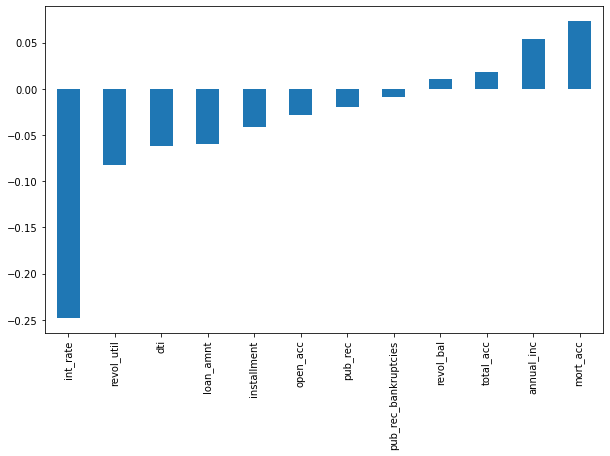

In [233]:
plt.figure(figsize = (10,6))
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind = 'bar')

----
---
<a id='preprocess'></a>
# Data PreProcessing


* Removing or filling missing data. 
* Removing unnecessary or repetitive features. 
* Converting categorical string features to dummy variables


In [28]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [30]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

### Percentage of Missing Data

In [31]:
(df.isnull().sum())*100 / 396030

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [32]:
feat_info('emp_title')
feat_info('emp_length')
feat_info('mort_acc')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
Number of mortgage accounts.


In [33]:
len(df['emp_title'].unique())

173106

A lot of employment titles are unique, so it is best to remove this column

In [34]:
df = df.drop('emp_title',axis = 1)

In [35]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [36]:
emp_length_order   = [
 '< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'                     
 ]

<AxesSubplot:xlabel='emp_length', ylabel='count'>

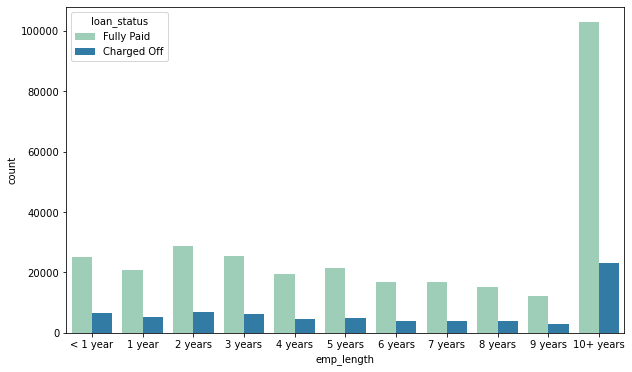

In [231]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'emp_length', order = emp_length_order, hue = 'loan_status',palette = 'YlGnBu')

Lets find out the percentage of defaulters in every employment length category 

In [38]:
emp_co = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']

In [39]:
emp_fp = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']

In [40]:
100*emp_co/(emp_co+emp_fp)

emp_length
1 year       19.913453
10+ years    18.418610
2 years      19.326206
3 years      19.523133
4 years      19.238477
5 years      19.218721
6 years      18.919438
7 years      19.477400
8 years      19.976002
9 years      20.047016
< 1 year     20.687155
Name: loan_status, dtype: float64

Approximately 20% people in all categories have not paid off their loans
So, we are just going to drop this column, because no useful info can be derived out from the column

In [41]:
df = df.drop('emp_length',axis = 1)

In [42]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [43]:
feat_info('title')

The loan title provided by the borrower


In [44]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [45]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

We can remove title column as it is pretty much same as purpose

In [46]:
df = df.drop('title', axis = 1)

Analysing the mort_acc feature

In [47]:
feat_info('mort_acc')

Number of mortgage accounts.


In [48]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

we will try to find correaltion of mort_acc with other values

In [49]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

total_acc is the most correlated, which makes sense because total accounts should correlate with number of mortgage accounts

In [50]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [51]:
def filling_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [52]:
df['mort_acc'] = df.apply(lambda x: filling_mort_acc(x['total_acc'],x['mort_acc'] ),axis = 1)

In [53]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

revol_util and pub_rec_bankruptcies have very small number of values missing, 
so we will just drop the rows and keep the columns

In [54]:
df = df.dropna()

In [55]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

Finally, we have no missing values, data has been cleaned

----
---
<a id='dummy'></a>
# Dealing with categorical variables and strings

In [172]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,26.24,1990,16.0,0.0,36369.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,22.05,2004,17.0,0.0,20131.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,12.79,2007,13.0,0.0,11987.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,2.60,2006,6.0,0.0,5472.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,33.95,1999,13.0,0.0,24584.0,...,0,0,1,0,0,0,0,0,0,0


Listing all feature names that are non-numeric

In [57]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [58]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [59]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [60]:
df['term'] = df['term'].apply(lambda term: (int(term[:3])))

In [61]:
df['term'].head()

0    36
1    36
2    36
3    36
4    60
Name: term, dtype: int64

We can drop the grade feature because that is already part of the sub-grade category

In [62]:
df = df.drop('grade',axis = 1)

In [63]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

We have 5 sub categories of every grade A to G

In [64]:
dummies = pd.get_dummies(df['sub_grade'], drop_first = True)
#got the dummies for sub_grade column

df = pd.concat([df.drop('sub_grade', axis = 1), dummies],axis = 1)

In [65]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [66]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [67]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [68]:
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

All of these can also be converted to dummy columns to repesent them in numerical format

In [69]:
dummies = pd.get_dummies(df[['initial_list_status','purpose','application_type','verification_status']], drop_first = True)

df = pd.concat([df.drop(['initial_list_status','purpose','application_type','verification_status'], axis = 1), dummies],axis = 1)

Analysing home_ownership

In [70]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

----

Most are in mortgage, rent or own category.
So we will just replace 'none' and 'any' with 'other' in the dataframe

In [71]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [72]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

Now converting this to dummy variable

In [73]:
dummies = pd.get_dummies(df['home_ownership'], drop_first = True)

df = pd.concat([df.drop('home_ownership', axis = 1), dummies],axis = 1)

----

### Converting categorical string features to dummy variables

In [74]:
df['address'].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [75]:
df['zip_code'] = df['address'].apply(lambda address: address[-5:]) #extracting last 5 characters i.e. zip code

In [76]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

We can create dummy variables for zip_code

In [77]:
dummies = pd.get_dummies(df['zip_code'], drop_first = True)

df = pd.concat([df.drop('zip_code', axis = 1), dummies],axis = 1)

df = df.drop('address',axis = 1)

In [78]:
feat_info('issue_d')

The month which the loan was funded


This is not a very useful column, so we will drop it

In [79]:
df = df.drop('issue_d',axis = 1)

In [80]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [81]:
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

We can extract the year out of this column and use it as a feature

In [82]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: date[-4:])

Now we are ready to create training and testing dataset and bulid our model.

----
---
<a id='tts'></a>
# Train Test Split

In [83]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
from sklearn.metrics import classification_report, confusion_matrix

Dropping loan_status as we already created loan_repaid with numerical values to represent the same

In [86]:
df = df.drop('loan_status', axis = 1)

In [87]:
X = df.drop('loan_repaid',axis = 1)
y = df['loan_repaid']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
y_train.value_counts()

1    254310
0     61865
Name: loan_repaid, dtype: int64

----
---
<a id='model'></a>
# Creating a Model

In [155]:
    model = Sequential()
    #keeping first layer equal to number of features
    model.add(Dense(78,activation = 'relu'))

    #We will add dropout layers after each layer to prevent overfitting problem
    model.add(Dropout(0.5))

    #next layers are all half the size
    model.add(Dense(39,activation = 'relu'))
    model.add(Dropout(0.5))

    model.add(Dense(19,activation = 'relu'))
    model.add(Dropout(0.5))

    model.add(Dense(units = 1, activation = 'sigmoid'))

    model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [156]:
scaler = StandardScaler()

<b>Here, we are creating a function that will standardize the data using StandardScaler and feed the data to out Deep Learning model to make Predictions that we will return as output of function</b>

In [157]:
def ANNmodel(X_train, X_test, y_train, y_test):
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(x = X_train, y = y_train, epochs = 25, batch_size=256,
         validation_data =(X_test, y_test))
              
    predictions = model.predict(X_test)
    predictions = np.round(predictions)
    
    return predictions

----
---
<a id='ensemble'></a>
## Using ensemble technique to deal with the imbalanced dataset

The dataset is very imbalanced with only about 20% samples of defaulters  

Our fully paid samples are approx 4 times that of charged off. So we will divide fully paid section into 4 batches of size 61865,61865,61865,remaining, and have 4 different models

In [92]:
X_train.shape

(316175, 78)

In [93]:
y_train.shape

(316175,)

In [94]:
trained_df = pd.concat([X_train, y_train], axis = 1)

In [95]:
df_class0 = trained_df[trained_df['loan_repaid'] == 0]
df_class1 = trained_df[trained_df['loan_repaid'] == 1]

In [96]:
df_class0.shape

(61865, 79)

In [97]:
df_class1.shape

(254310, 79)

In [98]:
def get_train_batch(df_majority,df_minority, start, end):
    df2 = pd.concat([df_majority[start:end],df_minority], axis = 0)
    X_train = df2.drop('loan_repaid',axis = 1)
    y_train = df2['loan_repaid']
    return X_train,y_train

<b>Our first model out of four</b>

In [123]:
X_train1,y_train1 = get_train_batch(df_class1,df_class0, 0, 61865)
pred1 = ANNmodel(X_train1, X_test, y_train1, y_test)

Epoch 1/25
484/484 [==============================] - 5s 8ms/step - loss: 0.5962 - val_loss: 0.5702
Epoch 2/25
484/484 [==============================] - 3s 7ms/step - loss: 0.4222 - val_loss: 1.0056
Epoch 3/25
484/484 [==============================] - 4s 8ms/step - loss: 0.3913 - val_loss: 1.7441
Epoch 4/25
484/484 [==============================] - 4s 8ms/step - loss: 0.3783 - val_loss: 2.3266
Epoch 5/25
484/484 [==============================] - 4s 8ms/step - loss: 0.3733 - val_loss: 2.6594
Epoch 6/25
484/484 [==============================] - 3s 7ms/step - loss: 0.3683 - val_loss: 3.1266
Epoch 7/25
484/484 [==============================] - 3s 7ms/step - loss: 0.3671 - val_loss: 3.2463
Epoch 8/25
484/484 [==============================] - 3s 7ms/step - loss: 0.3660 - val_loss: 3.5736
Epoch 9/25
484/484 [==============================] - 3s 7ms/step - loss: 0.3637 - val_loss: 3.9255
Epoch 10/25
484/484 [==============================] - 3s 7ms/step - loss: 0.3636 - val_loss: 4.0825

In [100]:
print("Classification report for model 1: \n")
print(classification_report(y_test, pred1))

print('\n')

print("Confusion Matrix: \n")
print(confusion_matrix(y_test, pred1))

Classification report for model 1: 

              precision    recall  f1-score   support

           0       0.50      0.81      0.61     15658
           1       0.94      0.80      0.86     63386

    accuracy                           0.80     79044
   macro avg       0.72      0.80      0.74     79044
weighted avg       0.85      0.80      0.81     79044



Confusion Matrix: 

[[12633  3025]
 [12839 50547]]


<b>Our second model out of four</b>

In [101]:
X_train2,y_train2 = get_train_batch(df_class1,df_class0, 61865, 123730)
pred2 = ANNmodel(X_train2, X_test, y_train2, y_test)

Epoch 1/25
484/484 [==============================] - 1s 2ms/step - loss: 0.5856 - val_loss: 0.3758
Epoch 2/25
484/484 [==============================] - 1s 1ms/step - loss: 0.4240 - val_loss: 0.3579
Epoch 3/25
484/484 [==============================] - 1s 1ms/step - loss: 0.3916 - val_loss: 0.3456
Epoch 4/25
484/484 [==============================] - 1s 1ms/step - loss: 0.3795 - val_loss: 0.3485
Epoch 5/25
484/484 [==============================] - 1s 1ms/step - loss: 0.3738 - val_loss: 0.3477
Epoch 6/25
484/484 [==============================] - 1s 1ms/step - loss: 0.3706 - val_loss: 0.3507
Epoch 7/25
484/484 [==============================] - 1s 1ms/step - loss: 0.3684 - val_loss: 0.3545
Epoch 8/25
484/484 [==============================] - 1s 1ms/step - loss: 0.3673 - val_loss: 0.3480
Epoch 9/25
484/484 [==============================] - 1s 1ms/step - loss: 0.3661 - val_loss: 0.3587
Epoch 10/25
484/484 [==============================] - 1s 1ms/step - loss: 0.3644 - val_loss: 0.3512

In [102]:
print("Classification report for model 2: \n")
print(classification_report(y_test, pred2))

print('\n')

print("Confusion Matrix: \n")
print(confusion_matrix(y_test, pred2))

Classification report for model 2: 

              precision    recall  f1-score   support

           0       0.48      0.83      0.61     15658
           1       0.95      0.78      0.85     63386

    accuracy                           0.79     79044
   macro avg       0.71      0.80      0.73     79044
weighted avg       0.85      0.79      0.80     79044



Confusion Matrix: 

[[12960  2698]
 [14190 49196]]


<b>Our third model out of four</b>

In [103]:
X_train3,y_train3 = get_train_batch(df_class1,df_class0, 123730,185595)
pred3 = ANNmodel(X_train3, X_test, y_train3, y_test)

Epoch 1/25
484/484 [==============================] - 1s 2ms/step - loss: 0.5893 - val_loss: 0.3982
Epoch 2/25
484/484 [==============================] - 1s 1ms/step - loss: 0.4162 - val_loss: 0.3704
Epoch 3/25
484/484 [==============================] - 1s 1ms/step - loss: 0.3882 - val_loss: 0.3590
Epoch 4/25
484/484 [==============================] - 1s 2ms/step - loss: 0.3789 - val_loss: 0.3645
Epoch 5/25
484/484 [==============================] - 1s 1ms/step - loss: 0.3724 - val_loss: 0.3566
Epoch 6/25
484/484 [==============================] - 2s 4ms/step - loss: 0.3695 - val_loss: 0.3651
Epoch 7/25
484/484 [==============================] - 2s 4ms/step - loss: 0.3681 - val_loss: 0.3633
Epoch 8/25
484/484 [==============================] - 1s 1ms/step - loss: 0.3657 - val_loss: 0.3585
Epoch 9/25
484/484 [==============================] - 1s 1ms/step - loss: 0.3657 - val_loss: 0.3555
Epoch 10/25
484/484 [==============================] - 1s 1ms/step - loss: 0.3648 - val_loss: 0.3597

In [104]:
print("Classification report of model 3: \n")
print(classification_report(y_test, pred3))

print('\n')

print("Confusion Matrix: \n")
print(confusion_matrix(y_test, pred3))

Classification report of model 3: 

              precision    recall  f1-score   support

           0       0.49      0.82      0.61     15658
           1       0.95      0.79      0.86     63386

    accuracy                           0.79     79044
   macro avg       0.72      0.80      0.73     79044
weighted avg       0.85      0.79      0.81     79044



Confusion Matrix: 

[[12812  2846]
 [13581 49805]]


<b>Our fourth model out of four</b>

In [105]:
X_train4,y_train4 = get_train_batch(df_class1,df_class0, 185595, 254310)
pred4 = ANNmodel(X_train4, X_test, y_train4, y_test)

Epoch 1/25
511/511 [==============================] - 1s 2ms/step - loss: 0.5753 - val_loss: 0.3708
Epoch 2/25
511/511 [==============================] - 1s 1ms/step - loss: 0.4151 - val_loss: 0.3497
Epoch 3/25
511/511 [==============================] - 1s 1ms/step - loss: 0.3885 - val_loss: 0.3479
Epoch 4/25
511/511 [==============================] - 1s 1ms/step - loss: 0.3771 - val_loss: 0.3442
Epoch 5/25
511/511 [==============================] - 1s 2ms/step - loss: 0.3707 - val_loss: 0.3428
Epoch 6/25
511/511 [==============================] - 1s 2ms/step - loss: 0.3678 - val_loss: 0.3358
Epoch 7/25
511/511 [==============================] - 1s 2ms/step - loss: 0.3663 - val_loss: 0.3357
Epoch 8/25
511/511 [==============================] - 1s 2ms/step - loss: 0.3644 - val_loss: 0.3442
Epoch 9/25
511/511 [==============================] - 1s 2ms/step - loss: 0.3634 - val_loss: 0.3460
Epoch 10/25
511/511 [==============================] - 1s 2ms/step - loss: 0.3626 - val_loss: 0.3375

In [106]:
print("Classification report for model 4: \n")
print(classification_report(y_test, pred4))

print('\n')

print("Confusion Matrix: \n")
print(confusion_matrix(y_test, pred4))

Classification report for model 4: 

              precision    recall  f1-score   support

           0       0.51      0.79      0.62     15658
           1       0.94      0.81      0.87     63386

    accuracy                           0.81     79044
   macro avg       0.73      0.80      0.75     79044
weighted avg       0.86      0.81      0.82     79044



Confusion Matrix: 

[[12350  3308]
 [11740 51646]]


Now we will take majority vote of all 4 models

In [107]:
final_predictions = pred1.copy()

for i in range(len(pred1)):
    total_ones = pred1[i] + pred2[i] + pred3[i] + pred4[i]
    if total_ones >= 2:
        final_predictions[i] = 1
    else:
        final_predictions[i] = 0

In [108]:
#final predictions

print("Classification report for final prediction: \n")
print(classification_report(y_test, final_predictions))

print('\n')

print("Confusion Matrix: \n")
print(confusion_matrix(y_test, final_predictions))

Classification report for final prediction: 

              precision    recall  f1-score   support

           0       0.50      0.80      0.62     15658
           1       0.94      0.81      0.87     63386

    accuracy                           0.80     79044
   macro avg       0.72      0.80      0.74     79044
weighted avg       0.86      0.80      0.82     79044



Confusion Matrix: 

[[12531  3127]
 [12299 51087]]


The final classification report has a slight improvement than when we did not use any technique to deal with the imbalance.
However, the results are still not satisfactory.

So, we will try another technique called SMOTE.

----
---
<a id='smote'></a>
## Using SMOTE to deal with imbalanced dataset

Synthetic Minority Oversampling Technique(SMOTE) uses K-nearest neighbours algorithm to oversample the data and make the minority value value counts equal to majority ones.
It creates new examples that are synthesized from the existing examples using KNN algorithm

In [109]:
from imblearn.over_sampling import SMOTE

In [161]:
smote = SMOTE(sampling_strategy='minority')

In [162]:
X_sm, y_sm = smote.fit_resample(X,y)

In [163]:
y_sm.value_counts()

1    317696
0    317696
Name: loan_repaid, dtype: int64

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=101)

In [159]:
new_pred = ANNmodel(X_train, X_test, y_train, y_test)

Epoch 1/25
1986/1986 [==============================] - 16s 7ms/step - loss: 0.2851 - val_loss: 0.1946
Epoch 2/25
1986/1986 [==============================] - 14s 7ms/step - loss: 0.2061 - val_loss: 0.1890
Epoch 3/25
1986/1986 [==============================] - 14s 7ms/step - loss: 0.1995 - val_loss: 0.1860
Epoch 4/25
1986/1986 [==============================] - 14s 7ms/step - loss: 0.1967 - val_loss: 0.1842
Epoch 5/25
1986/1986 [==============================] - 14s 7ms/step - loss: 0.1950 - val_loss: 0.1838
Epoch 6/25
1986/1986 [==============================] - 14s 7ms/step - loss: 0.1938 - val_loss: 0.1836
Epoch 7/25
1986/1986 [==============================] - 14s 7ms/step - loss: 0.1936 - val_loss: 0.1828
Epoch 8/25
1986/1986 [==============================] - 14s 7ms/step - loss: 0.1927 - val_loss: 0.1818
Epoch 9/25
1986/1986 [==============================] - 14s 7ms/step - loss: 0.1925 - val_loss: 0.1821
Epoch 10/25
1986/1986 [==============================] - 14s 7ms/step - l

----
---
<a id='evaluation'></a>
# Our final evaluation

In [115]:
#smote predictions

print("Classification report for SMOTE: \n")
print(classification_report(y_test, new_pred))

print('\n')

print("Confusion Matrix: \n")
print(confusion_matrix(y_test, new_pred))

Classification report for SMOTE: 

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     63446
           1       0.87      1.00      0.93     63633

    accuracy                           0.92    127079
   macro avg       0.93      0.92      0.92    127079
weighted avg       0.93      0.92      0.92    127079



Confusion Matrix: 

[[53655  9791]
 [  122 63511]]


In [160]:
y_train.value_counts()

0    254250
1    254063
Name: loan_repaid, dtype: int64

### We have improved the accuracy and f1-score of our model to 92%.
It is clear that SMOTE worked very well with our dataset and increased the f1-score for minority values from ~61% to 92%. Hence, this model can be used to make some pretty accurate predictions 

----
---
<a id='testing'></a>
# Testing our model for a new person seeking loan

For this, we will randomly pick an entry from our dataset and see whether it predicts the correct result or not

In [150]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]

In [151]:
new_customer = new_customer.astype('float')

In [165]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [169]:
model.predict_classes(new_customer)

array([[1]])

Now lets check whether the prediction made is true or not

In [170]:
df.iloc[random_ind]['loan_repaid']

1

We got it right with our model

----
---
# Thank You :)